In [6]:
#　いろいろな検索をしてみる

In [7]:
import pandas as pd

In [8]:
df_master = pd.read_csv("sample_survey.csv")

In [9]:
df = df_master.copy()
df = df.dropna(subset=["回答"])

In [10]:
import MeCab

In [11]:
m = MeCab.Tagger('-Ochasen  -d /usr/local/lib/mecab/dic/mecab-ipadic-neologd')

In [12]:
def word_analysis(doc):
    node = m.parseToNode(doc)
    word_list=[]
    while node:
        hinshi = node.feature.split(",")[0]
        if hinshi == "名詞":
          word_list.append(node.feature.split(",")[6])
        node = node.next
    return word_list

In [13]:
word_analysis("私とあなたはカレーを机の上で食べました。")

['私', 'あなた', 'カレー', '机', '上']

In [14]:
df["名詞"]=df["回答"].apply(word_analysis)

In [15]:
df

,性別,年代,回答,名詞
0,男性,3,駅でをみる,[駅]
1,女性,3,おせちを食べる,[おせち]
2,女性,4,家族でゲームする,"[家族, ゲーム]"
3,男性,5,サッカーをする,[サッカー]


In [33]:
import itertools
import collections
##この部分で抽出条件をいろいろ設定する
##　男性だけの名詞を検索。男性の部分を20代にするなど調整する事でいろいろ抽出できる
word_pickup = df["名詞"]

words =list( itertools.chain.from_iterable(word_pickup))
c = collections.Counter(words)


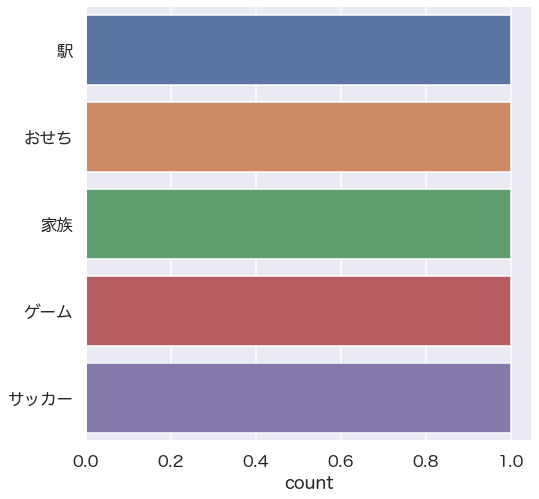

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font = "Hiragino Maru Gothic Pro",context="talk")
#文字を大きくしたい場合は、context="talk"で大きい順（　poster,talk,notebook,paper）で文字サイズを調整する
fig = plt.subplots(figsize=(8,8))
sns.countplot(y=words,order=[i[0] for i in c.most_common(10)])

In [32]:
#　文字化けしての日本語が表示されない時は、以下で日本語fontを検索できる
#使いたい日本語fontを上記の「sns.set()」のところにsns.set(font = "Hiragino Maru Gothic Pro")と入力すると表示されるようになる
import matplotlib.font_manager
print([f.name for f in matplotlib.font_manager.fontManager.ttflist])

['STIXSizeFourSym', 'STIXSizeFiveSym', 'DejaVu Sans Mono', 'cmr10', 'DejaVu Sans', 'cmtt10', 'cmss10', 'cmb10', 'STIXSizeOneSym', 'DejaVu Sans Mono', 'DejaVu Serif Display', 'STIXSizeFourSym', 'DejaVu Serif', 'STIXNonUnicode', 'STIXNonUnicode', 'STIXSizeThreeSym', 'STIXSizeTwoSym', 'DejaVu Serif', 'DejaVu Sans Mono', 'DejaVu Serif', 'cmmi10', 'STIXGeneral', 'cmex10', 'DejaVu Sans', 'STIXNonUnicode', 'DejaVu Sans Mono', 'STIXNonUnicode', 'STIXSizeThreeSym', 'STIXGeneral', 'DejaVu Sans Display', 'cmsy10', 'STIXGeneral', 'DejaVu Serif', 'DejaVu Sans', 'DejaVu Sans', 'STIXGeneral', 'STIXSizeTwoSym', 'STIXSizeOneSym', 'Apple Braille', 'Noto Sans Inscriptional Parthian', 'Arial Narrow', 'Noto Sans Kaithi', 'Apple SD Gothic Neo', 'Noto Sans Kannada', 'Trebuchet MS', 'Mshtakan', 'Arial Narrow', 'Noto Sans Lycian', 'Noto Sans Carian', 'Noto Sans Syloti Nagri', 'Noto Sans Oriya', 'Noto Sans Avestan', '.Arabic UI Display', 'STIXNonUnicode', 'Noto Sans New Tai Lue', 'Devanagari Sangam MN', 'Times 